# ***Divorce Prediction***
Dataset link: https://www.kaggle.com/datasets/andrewmvd/divorce-prediction?select=reference.tsv

The couples are from various regions of Turkey where in the records were acquired from face-to-face interviews from couples who were already divorced or happily married.
All responses were collected on a 5 point scale (0=Never, 1=Seldom, 2=Averagely, 3=Frequently, 4=Always).

**Questions:**

Q1 If one of us apologizes when our discussion deteriorates, the discussion ends.

Q2 I know we can ignore our differences, even if things get hard sometimes.

Q3 When we need it, we can take our discussions with my spouse from the beginning and correct it.

Q4 When I discuss with my spouse, to contact him will eventually work.

Q5 The time I spent with my wife is special for us.

Q6 We don't have time at home as partners.

Q7 We are like two strangers who share the same environment at home rather than family.

Q8 I enjoy our holidays with my wife.

Q9 I enjoy traveling with my wife.

Q10 Most of our goals are common to my spouse.

Q11 I think that one day in the future, when I look back, I see that my spouse and I have been in harmon...

Q12 My spouse and I have similar values in terms of personal freedom.

Q13 My spouse and I have similar sense of entertainment.

Q14 Most of our goals for people (children, friends, etc.) are the same.

Q15 Our dreams with my spouse are similar and harmonious.

Q16 We're compatible with my spouse about what love should be.

Q17 We share the same views about being happy in our life with my spouse

Q18 My spouse and I have similar ideas about how marriage should be

Q19 My spouse and I have similar ideas about how roles should be in marriage

Q20 My spouse and I have similar values in trust.

Q21 I know exactly what my wife likes.

Q22 I know how my spouse wants to be taken care of when she/he sick.

Q23 I know my spouse's favorite food.

Q24 I can tell you what kind of stress my spouse is facing in her/his life.

Q25 I have knowledge of my spouse's inner world.

Q26 I know my spouse's basic anxieties.

Q27 I know what my spouse's current sources of stress are.

Q28 I know my spouse's hopes and wishes.

Q29 I know my spouse very well.

Q30 I know my spouse's friends and their social relationships.

Q31 I feel aggressive when I argue with my spouse.

Q32 When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .

Q33 I can use negative statements about my spouse's personality during our discussions.

Q34 I can use offensive expressions during our discussions.

Q35 I can insult my spouse during our discussions.

Q36 I can be humiliating when we discussions.

Q37 My discussion with my spouse is not calm.

Q38 I hate my spouse's way of open a subject.

Q39 Our discussions often occur suddenly.

Q40 We're just starting a discussion before I know what's going on.

Q41 When I talk to my spouse about something, my calm suddenly breaks.

Q42 When I argue with my spouse, ı only go out and I don't say a word.

Q43 I mostly stay silent to calm the environment a little bit.

Q44 Sometimes I think it's good for me to leave home for a while.

Q45 I'd rather stay silent than discuss with my spouse.

Q46 Even if I'm right in the discussion, I stay silent to hurt my spouse.

Q47 When I discuss with my spouse, I stay silent because I am afraid of not being able to control my ang...

Q48 I feel right in our discussions.

Q49 I have nothing to do with what I've been accused of.

Q50 I'm not actually the one who's guilty about what I'm accused of.

Q51 I'm not the one who's wrong about problems at home.

Q52 I wouldn't hesitate to tell my spouse about her/his inadequacy.

Q53 When I discuss, I remind my spouse of her/his inadequacy.

Q54 I'm not afraid to tell my spouse about her/his incompetence.

# <span style="color:blue">Importing Libraries</span>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# <span style="color:blue">Loadings Datasets </span>

In [2]:
df=pd.read_csv('/kaggle/input/divorce-prediction/divorce_data.csv',delimiter=';')
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


# <span style="color:blue">Pre-processing of data </span>

In [3]:
# NA values
df.isna().sum()

Q1         0
Q2         0
Q3         0
Q4         0
Q5         0
Q6         0
Q7         0
Q8         0
Q9         0
Q10        0
Q11        0
Q12        0
Q13        0
Q14        0
Q15        0
Q16        0
Q17        0
Q18        0
Q19        0
Q20        0
Q21        0
Q22        0
Q23        0
Q24        0
Q25        0
Q26        0
Q27        0
Q28        0
Q29        0
Q30        0
Q31        0
Q32        0
Q33        0
Q34        0
Q35        0
Q36        0
Q37        0
Q38        0
Q39        0
Q40        0
Q41        0
Q42        0
Q43        0
Q44        0
Q45        0
Q46        0
Q47        0
Q48        0
Q49        0
Q50        0
Q51        0
Q52        0
Q53        0
Q54        0
Divorce    0
dtype: int64

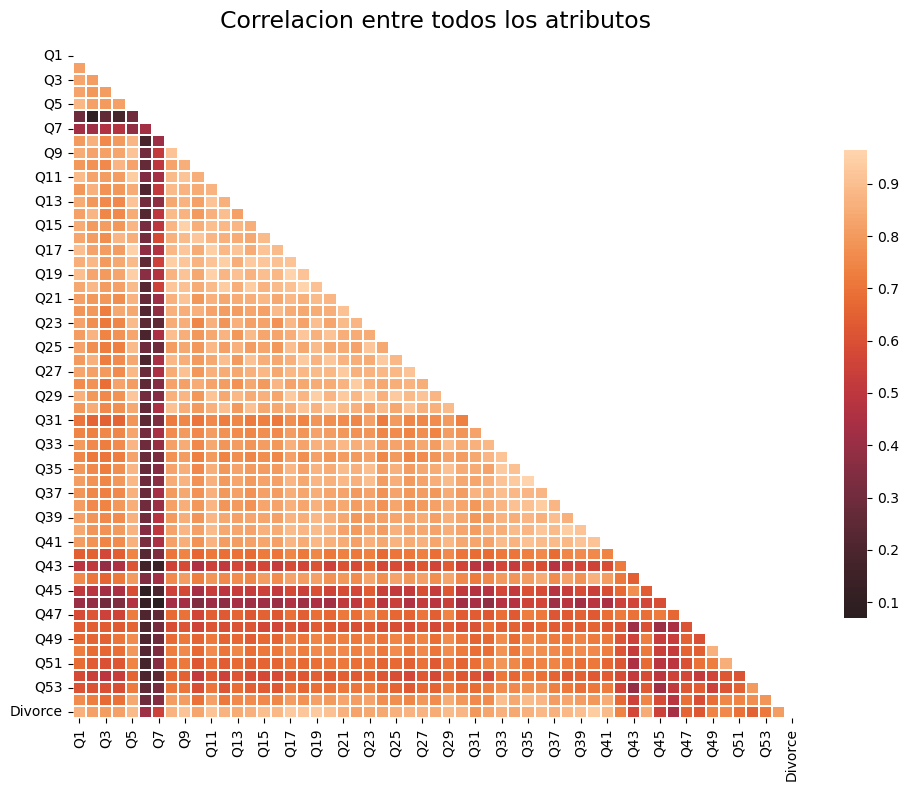

In [4]:
# Correlation between all attributes
fig,ax = plt.subplots(figsize=(10,8))

heat_df = df.corr()
plt.title("Correlacion entre todos los atributos", fontsize=17,y=1.02)
sns.color_palette("magma", as_cmap=True)
mask = np.triu(np.ones_like(heat_df, dtype=bool))
sns.heatmap(data=heat_df,annot=False,mask=mask,center=0,linewidths=0.3,annot_kws={"fontsize":12},cbar_kws={"shrink": .7});

plt.tight_layout()

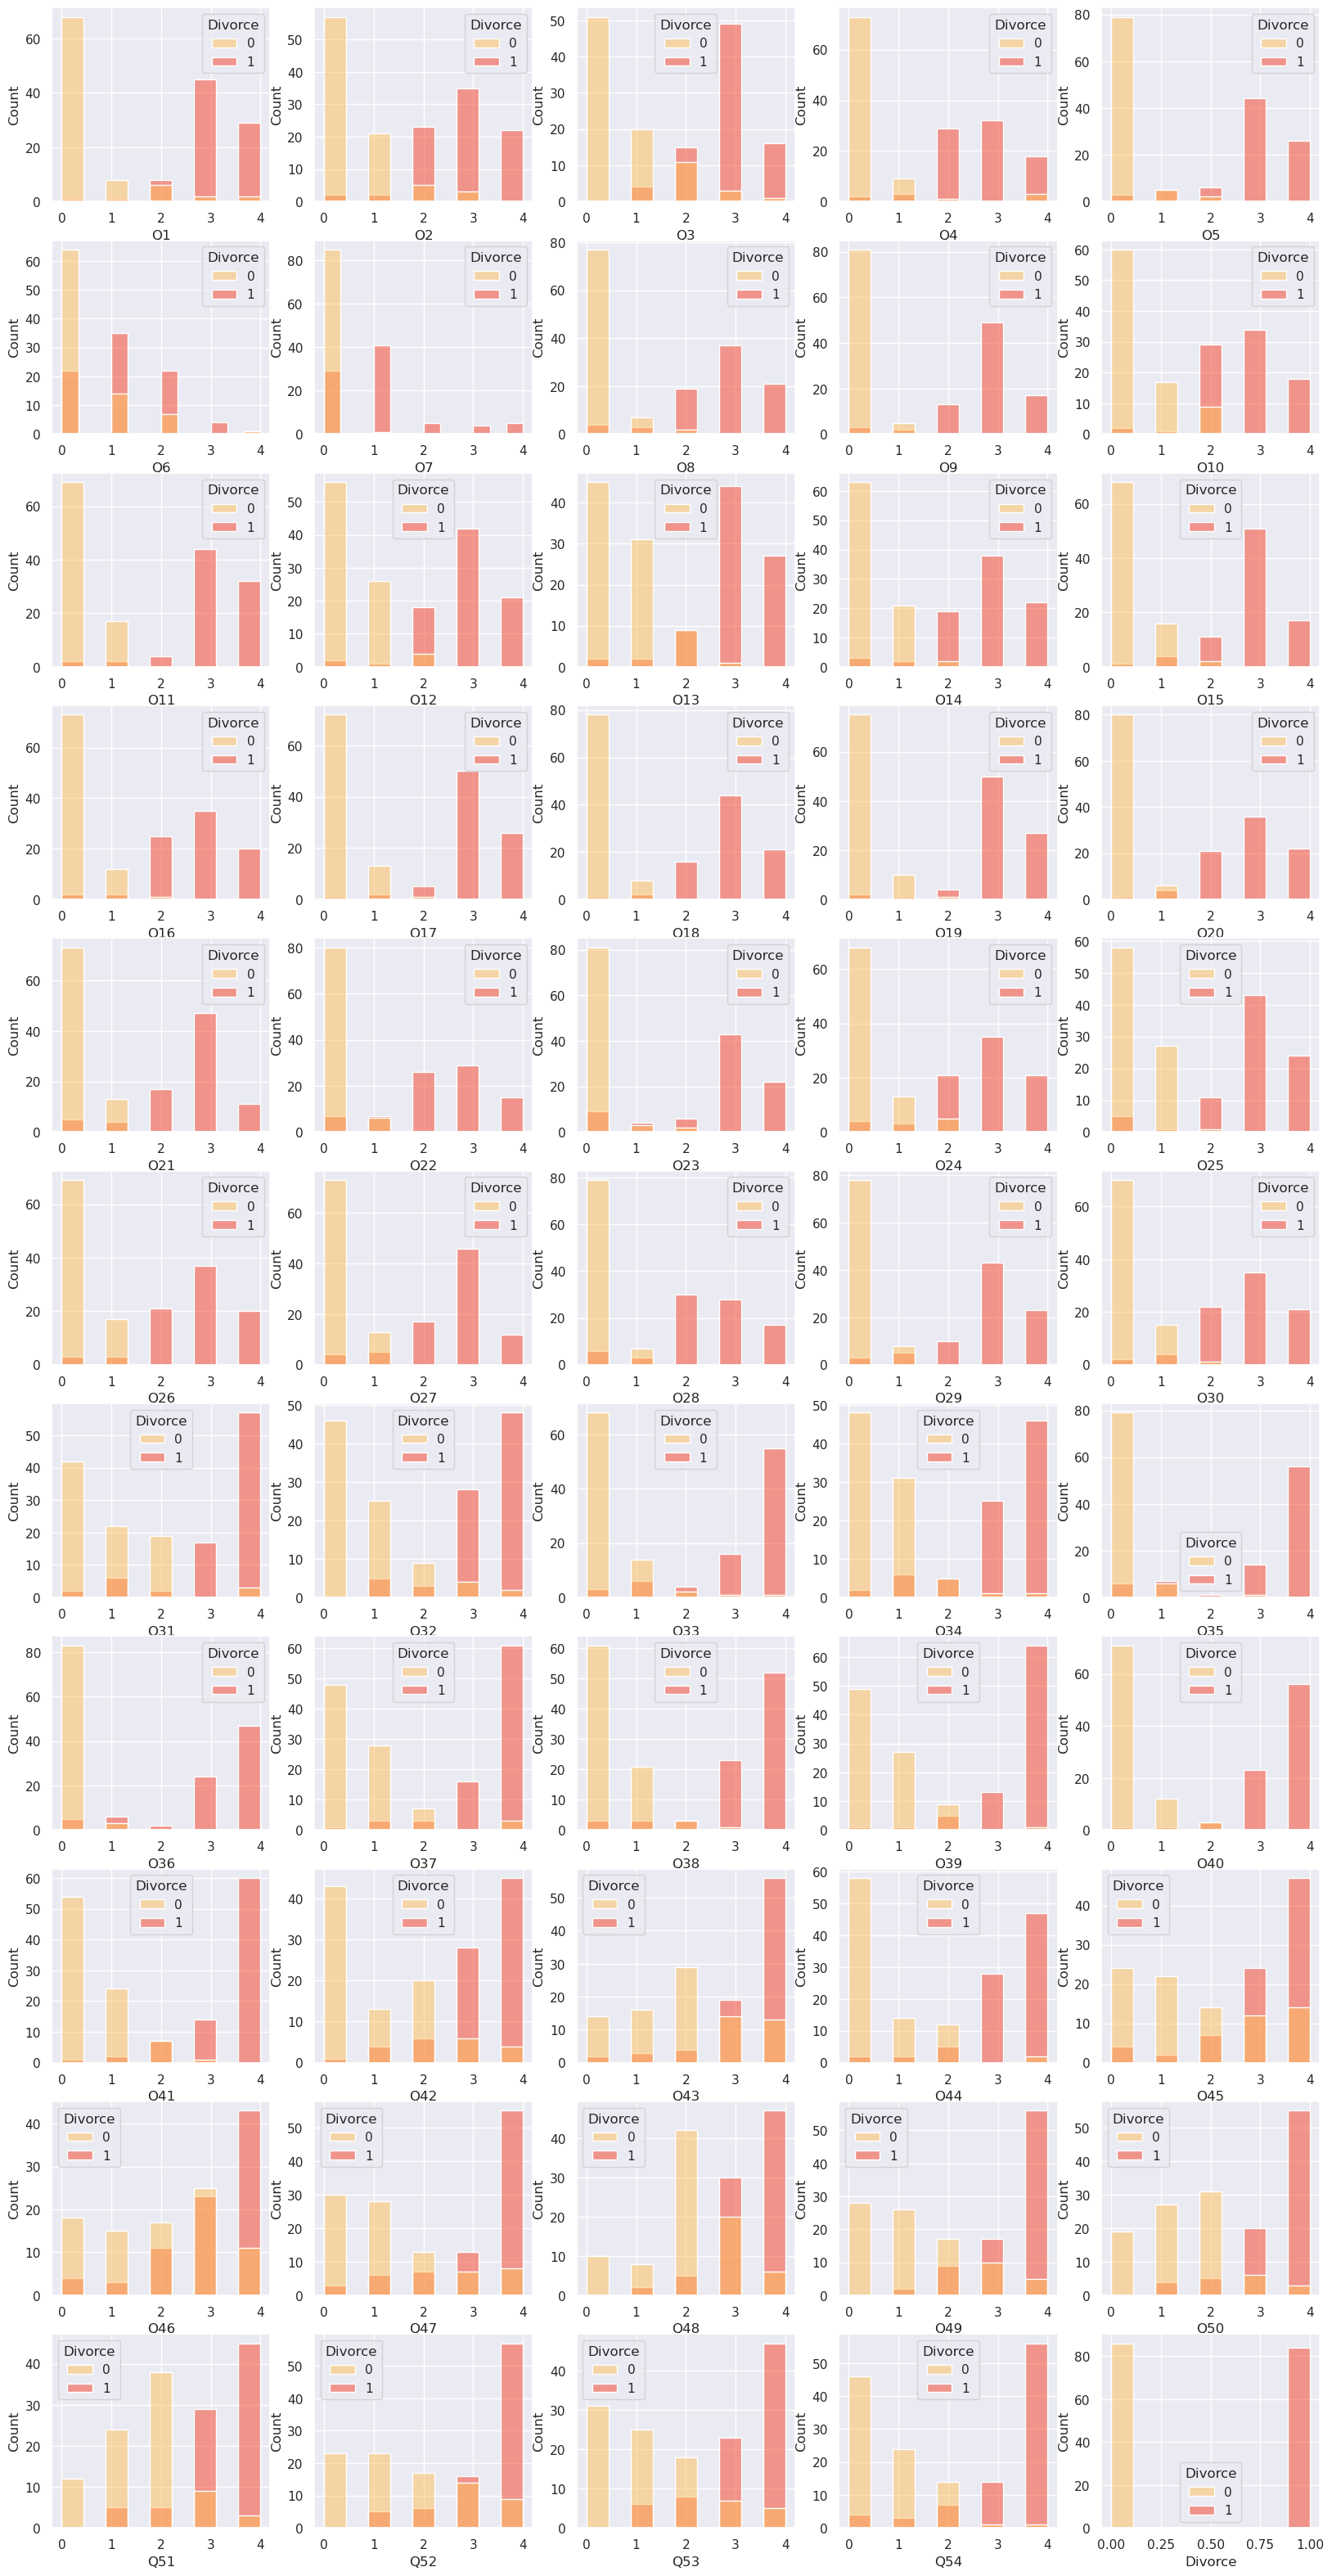

In [5]:
# Answers to each question according to number of answers
sns.set(rc={'figure.figsize':(20,40)})
for i, column in enumerate(list(df.columns), 1):
    plt.subplot(11,5,i)
    p=sns.histplot(x=column,data=df,hue="Divorce",stat='count',palette='YlOrRd')

In [6]:
# Separating the variables from the target variable
X=df.drop(axis=1,columns=['Divorce'])
y=df.Divorce


In [7]:
# Normalizing attribute values ​​to a standard deviation of 1
scaler = StandardScaler()
scaler.fit_transform(X);

In [8]:
# Separating training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# <span style="color:blue">Training </span>

****Random Forest****

In [9]:
# Model
model = RandomForestClassifier(n_estimators=100,random_state=0)

# Training
model.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

# <span style="color:blue">Testing </span>

In [10]:
# Testing
y_pred = model.predict(X_test)

In [11]:
# Calculation of model accuracy
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

Overall Accuracy: 94.12%


> **Accuracy: 94.12%**

**Confusion matrix**

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.89      0.94        18

    accuracy                           0.94        34
   macro avg       0.94      0.94      0.94        34
weighted avg       0.95      0.94      0.94        34



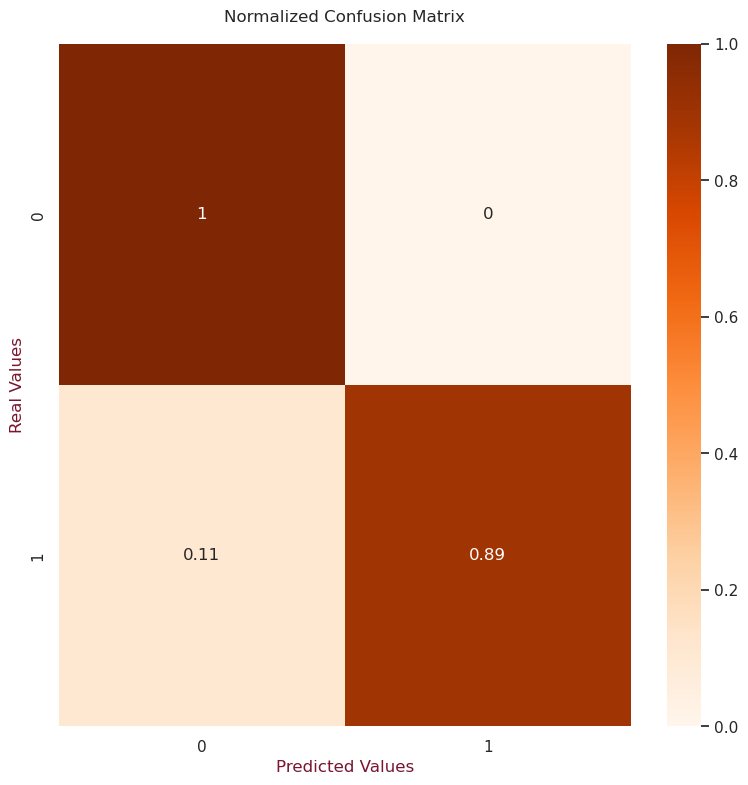

In [12]:
# Confusion matrix
fig, ax = plt.subplots(figsize=(8,8))

norm_conf = [i for i in confusion_matrix(y_test,y_pred)]
norm_conf[0] = norm_conf[0] / norm_conf[0].sum()
norm_conf[1] = norm_conf[1] / norm_conf[1].sum()
sns.color_palette("magma", as_cmap=True)
sns.heatmap(data=norm_conf, annot=True,ax=ax,cmap='Oranges')
ax.set_title("Normalized Confusion Matrix",y=1.02)
ax.set_ylabel("Real Values", c="#781530")
ax.set_xlabel("Predicted Values", c="#781530")

plt.tight_layout()
print(classification_report(y_test,y_pred))